In [1]:
#подключаем библиотеки и загружаем данные.
import pandas as pd
import numpy as np

data = pd.read_csv(r'sommelier_train.csv')
data.head(20)

,Country,Winery,Description,Designation,Province,Primary_region,Specific_region,Rate,Price,Variety
0,Portugal,Wines & Winemakers,"A classic Douro blend of Touriga Nacional, Tou...",Lua Cheia em Vinhas Velhas Colleja,Douro,NaN,NaN,87,12.0,Portuguese Red
1,US,Clos La Chance,"A little light in body and fruit, but achieves...",NaN,California,Santa Cruz Mountains,Central Coast,87,25.0,Pinot Noir
2,Spain,Pago de Carraovejas,"Big, bawdy, hard and concentrated, with black ...",Crianza,Northern Spain,Ribera del Duero,NaN,88,57.0,Tempranillo Blend
3,US,Six Sigma Ranch,Shows a polished structure that's dry and mode...,NaN,California,Lake County,Mendocino/Lake Counties,85,42.0,Cabernet Sauvignon
4,US,Coelho,"Fresh, clean flavors of plum and wild cherry a...",Estate Paciência,Oregon,Willamette Valley,Willamette Valley,89,45.0,Pinot Noir
5,US,Lancaster,"A challenging wine, made all the more so becau...",Estate,California,Alexander Valley,Sonoma,89,65.0,Cabernet Sauvignon
6,US,Steven Kent,Give this Cabernet some time in the cellar. Ri...,Ghielmetti Vineyard,California,Livermore Valley,Central Coast,93,60.0,Cabernet Sauvignon
7,France,Château Seguin,Earthy aromas are an off-putting start to this...,NaN,Bordeaux,Blaye Côtes de Bordeaux,NaN,83,15.0,Bordeaux-style Red Blend
8,US,Billsboro,"Notes of violet, preserved plums and cherries ...",NaN,New York,Finger Lakes,Finger Lakes,90,24.0,Pinot Noir
9,US,Peachy Canyon,"This wine strikes a perfect balance, showing t...",Westside,California,Paso Robles,Central Coast,89,19.0,Zinfandel


In [2]:
# приведем всте строки к нижнему регистру
for str_col in data.select_dtypes(include='object').columns:
    data[str_col] = data[str_col].str.lower()
data

,Country,Winery,Description,Designation,Province,Primary_region,Specific_region,Rate,Price,Variety
0,portugal,wines & winemakers,"a classic douro blend of touriga nacional, tou...",lua cheia em vinhas velhas colleja,douro,NaN,NaN,87,12.0,portuguese red
1,us,clos la chance,"a little light in body and fruit, but achieves...",NaN,california,santa cruz mountains,central coast,87,25.0,pinot noir
2,spain,pago de carraovejas,"big, bawdy, hard and concentrated, with black ...",crianza,northern spain,ribera del duero,NaN,88,57.0,tempranillo blend
3,us,six sigma ranch,shows a polished structure that's dry and mode...,NaN,california,lake county,mendocino/lake counties,85,42.0,cabernet sauvignon
4,us,coelho,"fresh, clean flavors of plum and wild cherry a...",estate paciência,oregon,willamette valley,willamette valley,89,45.0,pinot noir
5,us,lancaster,"a challenging wine, made all the more so becau...",estate,california,alexander valley,sonoma,89,65.0,cabernet sauvignon
6,us,steven kent,give this cabernet some time in the cellar. ri...,ghielmetti vineyard,california,livermore valley,central coast,93,60.0,cabernet sauvignon
7,france,château seguin,earthy aromas are an off-putting start to this...,NaN,bordeaux,blaye côtes de bordeaux,NaN,83,15.0,bordeaux-style red blend
8,us,billsboro,"notes of violet, preserved plums and cherries ...",NaN,new york,finger lakes,finger lakes,90,24.0,pinot noir
9,us,peachy canyon,"this wine strikes a perfect balance, showing t...",westside,california,paso robles,central coast,89,19.0,zinfandel


In [3]:
#Удаляем дубликаты по Description. они лишние
print('Before drop: ', len(data.index))
data = data.drop_duplicates(['Description'])
print('After drop: ', len(data.index))

Before drop:  118588
After drop:  83292


In [4]:
#Удаляем полные дубликаты. они лишние
print('Before drop: ', len(data.index))
data = data.drop_duplicates()
print('After drop: ', len(data.index))

Before drop:  83292
After drop:  83292


In [5]:
#сколько пропусков в каждом столбце % и всего
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Specific_region,49213,59.084906
Designation,25491,30.604380
Primary_region,13418,16.109590
Price,7416,8.903616
Province,2,0.002401
Country,2,0.002401
Variety,0,0.000000
Rate,0,0.000000
Description,0,0.000000
Winery,0,0.000000


In [6]:
#Specific_region, Designation, Primary_region - совсем плохо. Уберем их
data = data.drop(['Specific_region', 'Designation', 'Primary_region'], axis='columns')
data.head()

,Country,Winery,Description,Province,Rate,Price,Variety
0,portugal,wines & winemakers,"a classic douro blend of touriga nacional, tou...",douro,87,12.0,portuguese red
1,us,clos la chance,"a little light in body and fruit, but achieves...",california,87,25.0,pinot noir
2,spain,pago de carraovejas,"big, bawdy, hard and concentrated, with black ...",northern spain,88,57.0,tempranillo blend
3,us,six sigma ranch,shows a polished structure that's dry and mode...,california,85,42.0,cabernet sauvignon
4,us,coelho,"fresh, clean flavors of plum and wild cherry a...",oregon,89,45.0,pinot noir


In [7]:
# Глянем сколько у нас пустых значений
data.isnull().sum()

Country           2
Winery            0
Description       0
Province          2
Rate              0
Price          7416
Variety           0
dtype: int64

In [8]:
# Глянем места где Country не заоплнено.
data[data['Country'].isnull()]

,Country,Winery,Description,Province,Rate,Price,Variety
9491,NaN,chilcas,"from first sniff to last, the nose never makes...",NaN,81,15.0,pinot noir
31252,NaN,büyülübağ,"a blend of 60% syrah, 30% cabernet sauvignon a...",NaN,90,30.0,red blend


In [9]:
# Сколько эксземпляров представлено
print(data['Variety'].value_counts()['pinot noir'])
print(data['Variety'].value_counts()['red blend'])

#2 строки никак не влияет. можно сбросить
data = data.dropna(subset=['Country'])
data.isnull().sum()

8043
5663


Country           0
Winery            0
Description       0
Province          0
Rate              0
Price          7416
Variety           0
dtype: int64

In [10]:
# заменяем на средние значения цены - по винодельне, стране и среднему значению
wineries = list(data['Winery'].unique())
countries = list(data['Country'].unique())
avg_value = data[['Price']].dropna().mean()
price_by_winery = data[['Winery', 'Price']].dropna().groupby(by=['Winery'])['Price'].mean().to_dict()
price_by_country = data[['Country', 'Price']].dropna().groupby(by=['Country'])['Price'].mean().to_dict()
price_by_rate = data[['Rate', 'Price']].dropna().groupby(by=['Rate'])['Price'].mean().to_dict()


data['Price'] = np.where(data['Price'].isna(), data['Winery'], data['Price'])
data['Price'] = data.replace(to_replace={'Price': price_by_winery})['Price']

data['Price'] = np.where(data['Price'].isin(wineries), data['Country'],  data['Price'])
data['Price'] = data.replace(to_replace={'Price': price_by_country})['Price']

data['Price'] = np.where(data['Price'].isin(countries), avg_value,  data['Price'])

data.isnull().sum()

Country        0
Winery         0
Description    0
Province       0
Rate           0
Price          0
Variety        0
dtype: int64

In [11]:
data['Price'] = pd.to_numeric(data['Price']).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83290 entries, 0 to 118586
Data columns (total 7 columns):
Country        83290 non-null object
Winery         83290 non-null object
Description    83290 non-null object
Province       83290 non-null object
Rate           83290 non-null int64
Price          83290 non-null float64
Variety        83290 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 5.1+ MB


,Rate,Price,Scaled price
count,83290.000000,83290.000000,83290.000000
mean,87.953332,35.329604,3.335256
std,3.221539,43.576471,0.650312
min,80.000000,4.000000,1.609438
25%,86.000000,16.000000,2.833213
50%,88.000000,25.000000,3.258097
75%,90.000000,42.000000,3.761200
max,100.000000,2300.000000,7.741099


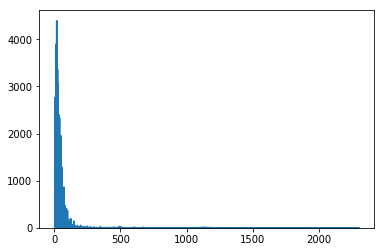

In [12]:
# для восстановления Price, глянем на распределение цен
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Глянем статистическую информацию
data.describe()

data['Price'].value_counts().sort_index().plot.area()
# по цене есть явные аутлайнеры. смасштабируем log
import math
data['Scaled price'] = data['Price']
data['Scaled price'] = data['Scaled price'].apply(lambda x: math.log(x+1))
data.describe()

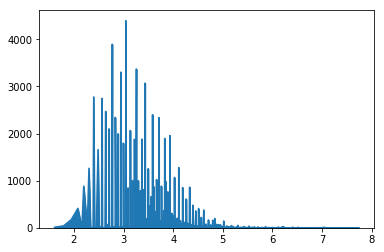

In [13]:
# взглянем уже на распределение масштабированной цены
data['Scaled price'].value_counts().sort_index().plot.area()

In [14]:
# Выходные параметры содержат СИНОНИМЫ. нужно привести к одному типу

'''
Удалить пробелы и точки. привести к нижнему регистру
'''
def nice_strip(line):
    clear_line = line.strip()
    clear_line = clear_line.strip('.')
    return clear_line.lower()

'''
Распарсить и сплеши в названии
'''
def parse_variety(line):
    line = nice_strip(line)
    splits = line.split('/')
    if len(splits) > 1:
        base_val =  nice_strip(splits[0])
        list_sym = []
        for i in range(1, len(splits)):
            list_sym.append(nice_strip(splits[i]))
        return base_val, list_sym
    else:
        return line, []
    
'''
Распарсить синонимы
'''
def parse_syno(line):
    result = []
    line = nice_strip(line)
    splits = line.split(',')
    for s in splits:
        result.append(nice_strip(s))
    return result

'''
Распарсить строку
'''
def make_pair(line):
    splits = line.split('\t')
    base_val, syno = parse_variety(splits[0])
    if len(splits) > 1:
        add_syno = parse_syno(splits[1])
        syno= syno + add_syno
    return base_val, syno
        

data_files= [r'table1.txt',r'table2.txt', r'table3.txt' ]

value_syno = {}
for file in data_files:
    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            key, value = make_pair(line)
            value_syno[key] = value

In [15]:
# функция преобразования синонимов 
def get_value(value):
    result = value
    while True:
        need_break = True
        for key in value_syno:
            syno_list = value_syno[key]
            if key != result and result in syno_list:
                need_break = False
                result = key
                break
        
        if need_break:           
            break

            
    return result

In [16]:
#удалим синонимы из вывода

variety = data['Variety'].values
print(variety.shape)
clear_variety = np.empty_like(variety)
index = 0
for i in range(0, variety.shape[0]):
    value = variety[i]
    clear_variety[i] = get_value(value)

data['Clear variety'] = clear_variety


(83290,)


In [17]:
s = list(data['Clear variety'].unique())
s.sort()
len(s)

157

In [18]:
data.head()

,Country,Winery,Description,Province,Rate,Price,Variety,Scaled price,Clear variety
0,portugal,wines & winemakers,"a classic douro blend of touriga nacional, tou...",douro,87,12.0,portuguese red,2.564949,portuguese red
1,us,clos la chance,"a little light in body and fruit, but achieves...",california,87,25.0,pinot noir,3.258097,blauer arbst
2,spain,pago de carraovejas,"big, bawdy, hard and concentrated, with black ...",northern spain,88,57.0,tempranillo blend,4.060443,tempranillo blend
3,us,six sigma ranch,shows a polished structure that's dry and mode...,california,85,42.0,cabernet sauvignon,3.761200,cabernet sauvignon
4,us,coelho,"fresh, clean flavors of plum and wild cherry a...",oregon,89,45.0,pinot noir,3.828641,blauer arbst


In [19]:
#сохраним подготовленные данные. Ничего не удаляем серьезно
data.to_csv(r'sommelier_train_clear.csv', sep=';')

In [20]:
#то же самое и для тестовых данных

test = pd.read_csv(r'sommelier_test.csv')
# приведем всте строки к нижнему регистру
for str_col in test.select_dtypes(include='object').columns:
    test[str_col] = test[str_col].str.lower()

    
#Удаляем дубликаты по Description. они лишние
print('Before drop: ', len(test.index))
test = test.drop_duplicates('Description')
print('After drop: ', len(test.index))

    
#Удаляем дубликаты по Description. они лишние
print('Before drop: ', len(test.index))
test = test.drop_duplicates()
print('After drop: ', len(test.index))
    
test = test.drop(['Specific_region', 'Designation', 'Primary_region'], axis='columns')
test.head()

Before drop:  29648
After drop:  27108
Before drop:  27108
After drop:  27108


,Country,Winery,Description,Province,Rate,Price,Variety
0,us,arkenstone,"wonderfully smooth in the mouth, all satin and...",california,87,70.0,syrah
1,italy,torre rosazza,here is a fragrant and mature-smelling norther...,northeastern italy,85,20.0,sauvignon
2,austria,josef jamek,"poised and elegant, this has deliciously restr...",wachau,92,56.0,grüner veltliner
3,italy,spinelli,here's an easygoing expression of montepulcian...,central italy,86,8.0,montepulciano
4,france,château lagarosse,"huge, rich, flaunting its opulence and ripenes...",bordeaux,87,36.0,bordeaux-style red blend


In [21]:
test.loc[test['Country'].isnull(), 'Country'] = 'chile'
test.loc[test['Province'].isnull(), 'Province'] = 'maule valley'
test.isnull().sum()


Country           0
Winery            0
Description       0
Province          0
Rate              0
Price          2467
Variety           0
dtype: int64

In [22]:
test['Price'] = np.where(test['Price'].isna(), test['Winery'], test['Price'])
test['Price'] = test.replace(to_replace={'Price': price_by_winery})['Price']

test['Price'] = np.where(test['Price'].isin(wineries), test['Country'],  test['Price'])
test['Price'] = test.replace(to_replace={'Price': price_by_country})['Price']

test['Price'] = np.where(test['Price'].isin(countries), avg_value,  test['Price'])
test['Price'] = np.where(test['Price'].isin(wineries), avg_value,  test['Price'])

test['Price'] = np.where(test['Price'].isin(['château ame de musset']), avg_value,  test['Price'])

test.isnull().sum()

Country        0
Winery         0
Description    0
Province       0
Rate           0
Price          0
Variety        0
dtype: int64

In [23]:
test['Price'] = np.where(test['Price'].isin(list(test['Winery'].unique())), avg_value,  test['Price'])
test['Price'] = pd.to_numeric(test['Price']).astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27108 entries, 0 to 29647
Data columns (total 7 columns):
Country        27108 non-null object
Winery         27108 non-null object
Description    27108 non-null object
Province       27108 non-null object
Rate           27108 non-null int64
Price          27108 non-null float64
Variety        27108 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [24]:
test['Scaled price'] = test['Price']
test['Scaled price'] = test['Scaled price'].apply(lambda x: math.log(x+1))
test.describe()

,Rate,Price,Scaled price
count,27108.000000,27108.000000,27108.000000
mean,87.898443,34.881985,3.327299
std,3.224724,40.240444,0.647442
min,80.000000,5.000000,1.791759
25%,86.000000,16.000000,2.833213
50%,88.000000,25.000000,3.258097
75%,90.000000,40.000000,3.713572
max,100.000000,1124.000000,7.025538


In [25]:
#удалим синонимы из вывода

variety = test['Variety'].values
print(variety.shape)
clear_variety = np.empty_like(variety)
index = 0
for i in range(0, variety.shape[0]):
    value = variety[i]
    clear_variety[i] = get_value(value)

test['Clear variety'] = clear_variety

(27108,)


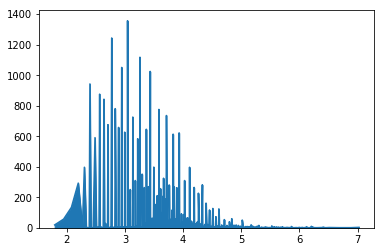

In [26]:
# взглянем уже на распределение масштабированной цены
test['Scaled price'].value_counts().sort_index().plot.area()

In [27]:
#сохраним подготовленные данные. Ничего не удаляем серьезно
test.to_csv(r'sommelier_test_clear.csv', sep=';')